<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-3:-Likelihoods" data-toc-modified-id="Chapter-3:-Likelihoods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 3: Likelihoods</a></span><ul class="toc-item"><li><span><a href="#Models-and-&quot;likelihood&quot;" data-toc-modified-id="Models-and-&quot;likelihood&quot;-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Models and "likelihood"</a></span><ul class="toc-item"><li><span><a href="#Coin-toss" data-toc-modified-id="Coin-toss-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Coin toss</a></span></li></ul></li><li><span><a href="#Some-clarifications" data-toc-modified-id="Some-clarifications-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Some clarifications</a></span><ul class="toc-item"><li><span><a href="#Equivalence-relation" data-toc-modified-id="Equivalence-relation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Equivalence relation</a></span></li><li><span><a href="#Exchangeability" data-toc-modified-id="Exchangeability-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Exchangeability</a></span></li><li><span><a href="#Maximum-likelihood" data-toc-modified-id="Maximum-likelihood-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Maximum likelihood</a></span></li></ul></li><li><span><a href="#Choosing-an-appropriate-likelihood-function" data-toc-modified-id="Choosing-an-appropriate-likelihood-function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Choosing an appropriate likelihood function</a></span></li></ul></li><li><span><a href="#Chapter-4:-Priors" data-toc-modified-id="Chapter-4:-Priors-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chapter 4: Priors</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.xkcd()

## Chapter 3: Likelihoods

These tell us how *likely* our model would be to generate the data that was actually observed given a specific vector of values for our parameter(s).

Clearly, then, there are three key things that will affect the numerical value of the likelihood:
- The actual data that we record.
- The model choice/assumptions.
- The parameter values of the model, $\theta$.

### Models and "likelihood"

Although, often ignored, the expression we actually care about, **the posterior**, is:

$p(data|\theta, model)$

We often drop the "model" but really this is critical. In some ways its importance is so explicit we can let it be implicit.

The reason we speak in terms of "likelihoods" is that what we get when we **keep data as constant and vary the 
parameters** is not a valid probability distributions. The example below will illustrate.

#### Coin toss

Let us imagine we are tossing a coin. Our model will include assumptions that that each coin toss is independent, and since we use the same coin the probability of Heads on each toss is the same. Hence, we have i.i.d. observations (**"independent and identically distributed"** - note this is also referred to as having a **"random sample"**). We make no assumptions about predictions based of other information sources, e.g. angle, velocity, atmospheric pressure in the room... (and so on)

Hence, our parameter vector $\theta$ is one dimensional. Let RV $X = 1$ when Heads and $= 0$ when Tails. So:
- $\Pr(X = 1) = \theta$
- $\Pr(X = 0) = 1 - \theta$
Note that whilst correct, this isn't that useful. We want a single expression.

Conveniently, we can write:

$$\Pr(X = \alpha) = \theta^\alpha \cdot (1 - \theta)^{(1 - \alpha)}$$

to express precisely the relationship we want.

By i.i.d. for $N$ coin tosses, we can define the RV $Y = \text{Total Heads}$, i.e. $Y = X_1 + ... + X_N$, or:

$$Y = \sum_{i=1}^N X_i$$

(Skipping, the combination vs permuations discussion)

Then, by i.i.d. we can say:

\begin{align}
\Pr(Y = \gamma) &= \binom{N}{\gamma} \prod_{i=1}^N \theta^{\alpha_i} \cdot (1 - \theta)^{(1 - \alpha_i)} \\
&= \binom{N}{\gamma} \theta^\gamma \cdot (1 - \theta)^{(N - \gamma)}
\end{align}

Note two things:
- We use "Pr(...)" since we dealing with a discrete RV.
- The "identical" assumption means we have the same $\theta$ for every coin toss.

For the sake of argument let $N = 3$ and $\theta = 0.4$. Then we have:
- $\Pr(Y = 0) = \binom{N}{0} 0.4^0 \cdot 0.6^3 = 1 \cdot 0.216 = 0.216$  
- $\Pr(Y = 0) = \binom{N}{1} 0.4^1 \cdot 0.6^2 = 3 \cdot 0.144 = 0.432$
- $\Pr(Y = 0) = \binom{N}{2} 0.4^2 \cdot 0.6^1 = 3 \cdot 0.096 = 0.288$
- $\Pr(Y = 0) = \binom{N}{3} 0.4^3 \cdot 0.6^0 = 1 \cdot 0.064 = 0.064$

Unsurprisingly, the 1 Head scenario has the highest **probability** of occuring. It suggests a $\frac{1}{3}$ chance of Heads which is closest to 0.4 of all the possibilities. Also note that $\sum_{i=0}^{N(=3)} \Pr(Y = i) = 1$. Further, the probability of any single outcome is $>0$ and $<1$.

**The key takeaway is that when we hold the model and parameter(s) constant and vary the data we end up with a valid probability distribution.**

But, let us now keep the data constant and see what happens as we vary the parameters.

Now, let us keep $N = 3$, but we will **fix the data so $Y = 2$, i.e. we have seen 2 Heads**. We want to see if $p(\theta | data, model)$ - this is the thing that is actually called the **"likelihood"** - is a valid probability distribution.

From the above we can say:

\begin{align}
p(\theta | data, model) &= p(\theta | Y = 2, model) \\
&= \binom{N}{\gamma} \theta^\gamma \cdot (1 - \theta)^{(N - \gamma)} \\
&= \binom{3}{2} \theta^2 \cdot (1 - \theta)^1 \\
&= 3 \theta^2 (1 - \theta) \\
\end{align}

Valid choices of $\theta$ are $\in[0,1]$ so we will see if we have a probability distribution using these as the limits of integration (since $\theta$ is continuous). Hence, we compute:

\begin{align}
\int_0^1 3 \theta^2 (1 - \theta) d\theta &= 3 \cdot (\frac{\theta^3}{3} - \frac{\theta^4}{4}) \Big|_0^1 \\
&= \theta^3 - \frac{3\theta^4}{4} \Big|_0^1 \\
&= 1 - \frac{3}{4} = 0.25
\end{align}

Note, that the integral does not sum to one so we do not have a valid **probability** distribution, hence why we refer to likelihoods. You can see however from the graph below that it does attain a maximum at $\frac{2}{3}$. So, although not a probability distribution it is validly indicated the relative probability that the parameter $\theta$ takes on a specific value.

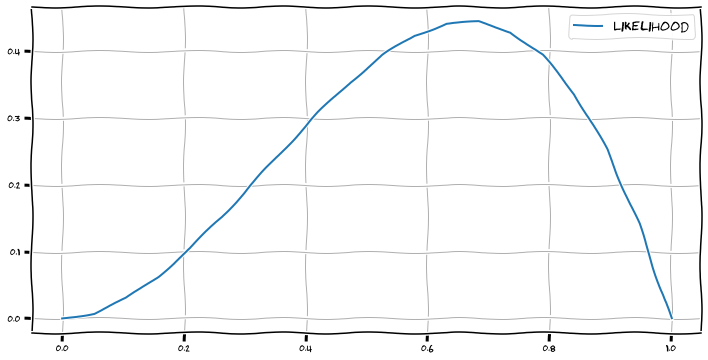

In [5]:
x = np.linspace(0, 1, 20)
y = 3 * x**2 * (1 - x)

# Set up subplot objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data
ax.plot(x, y, label='Likelihood')

# Extras
ax.grid(True, linewidth=1)
ax.legend(fontsize=14)

plt.show()

### Some clarifications

#### Equivalence relation

Often, to make clear that we are not dealing with a probability distribution, $\mathcal{L}(\theta|data) = p(data | \theta)$. This termed the **equivalence relation**, since the likelihood of a parameter vector given a data sample is equivalent to the probability of that data sample given those parameter values. All that really matters is you understand that:
- Data is fixed.
- We are varying $\theta$.
- The term as a whole is not a valid probability distributions.

#### Exchangeability

If a sequence of random variables is equally as likely as any reordered sequence of the same RVs, then the sequence is said to be "exchangeable". This is a weaker assumption than "random sampling" (truly i.i.d.) but thanks to a formula in sufficiently large sample sizes we can treat exchangeable sequences as if they were randomly sampled and infer accordingly.

#### Maximum likelihood

MLE estimation is the point estimate of the parameter vector, $\theta$, that maximises the likelihood. It ignores, the prior. This offers a simple insight into why it is prone to overfitting in a way the posterior is not. The posterior encapsulates our uncertainty automatically. Uncertainty for likelihoods involves looking at the curvature around the maximum. Sharp curvature implies a higher certainty, and vice versa. There is obviously a lot more to it than this.

### Choosing an appropriate likelihood function

Your model will be wrong, you just want to make it as little wrong as possible, and hopefully it will produce results and prediction that are reasonable, given the real world. Choosing a good function will be more art than skill, and we will see later certain established choices for various types of assumptions.

## Chapter 4: Priors